## Purpose

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import scipy as sp
import scipy.interpolate
#import sunpy.map
import astropy.io.fits
import matplotlib.pylab as plt
import matplotlib.colors as colors
import sunpy.visualization.colormaps as cm

## Load data and plot with reasonable colormap

In [3]:
#sin = sunpy.map.Map('sinecr2124.fits')
sin = astropy.io.fits.open('sinecr2114.fits')
sin.info()

Filename: sinecr2114.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      30   (3600, 1080)   uint8   


ORIGIN  ='SDO/JSOC-SDP'                                                          [astropy.io.fits.card]
TELESCOP='SDO/AIA_2'                                                             [astropy.io.fits.card]
IMG_TYPE = 'Light'                                                               [astropy.io.fits.card]


In [4]:
#lat = sunpy.map.Map('CR2124.fits')
lat = astropy.io.fits.open('CR2114.fits')
lat.info()

Filename: CR2114.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      29   (3600, 1080)   float64   


In [5]:
sin[0].header

 [astropy.io.fits.verify]


SIMPLE  =                    T / Written by IDL:  Fri Nov 18 17:23:33 2011      
BITPIX  =                    8 / Character or unsigned binary integer           
NAXIS   =                    2                                                  
NAXIS1  =                  3600                                                 
NAXIS2  =                  1080                                                 
WAVELNTH= '304 =He II '                                                         
ORIGIN  ='SDO/JSOC-SDP'                                                         
TELESCOP='SDO/AIA_2'                                                            
R_SUN   = 1603.465820                                                           
BSCALE  =   1.000000000000E+00                                                  
BZERO   =   0.000000000000E+00                                                  
BLANK   =                 1000 /                                                
CRPIX1  =                 18

In [6]:
sin[0].data.shape

(1080, 3600)

![title](cr2114.png)

![title](sinecr2114.png)

In [7]:
lat_extent = [0, 360, -90, 90]

In [8]:
lat[0].data[~np.isnan(lat[0].data)].max()

4736.90625

<IPython.core.display.Javascript object>


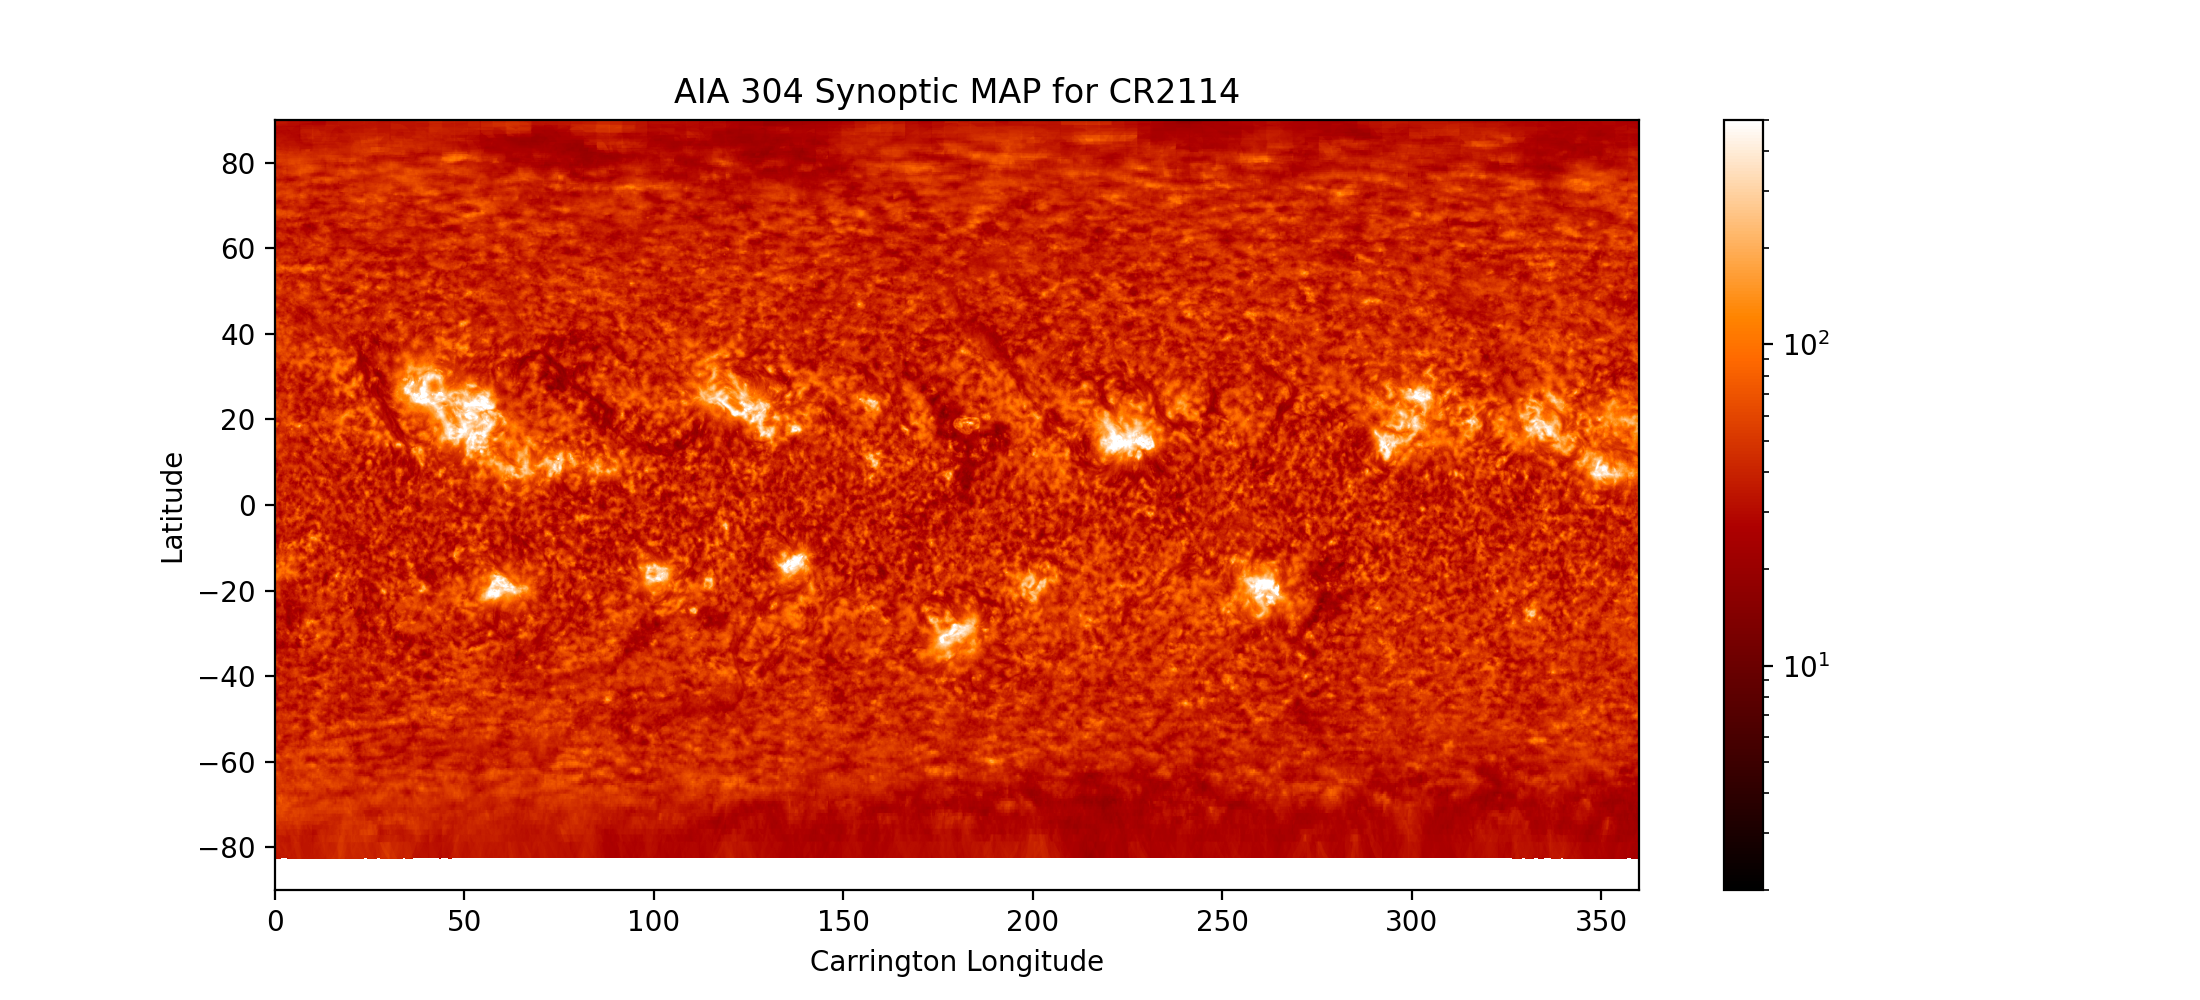

In [9]:
fig, ax = plt.subplots(figsize=(11, 5))
im = ax.imshow(lat[0].data, cmap='sdoaia304', norm=colors.LogNorm(2, 500), extent=lat_extent, origin='lower', aspect='auto')
ax.set_xlabel('Carrington Longitude')
ax.set_ylabel('Latitude')
ax.set_title('AIA 304 Synoptic MAP for CR2114')
fig.colorbar(im);

In [10]:
sin_extent = [0, 360, -1, 1]

<IPython.core.display.Javascript object>


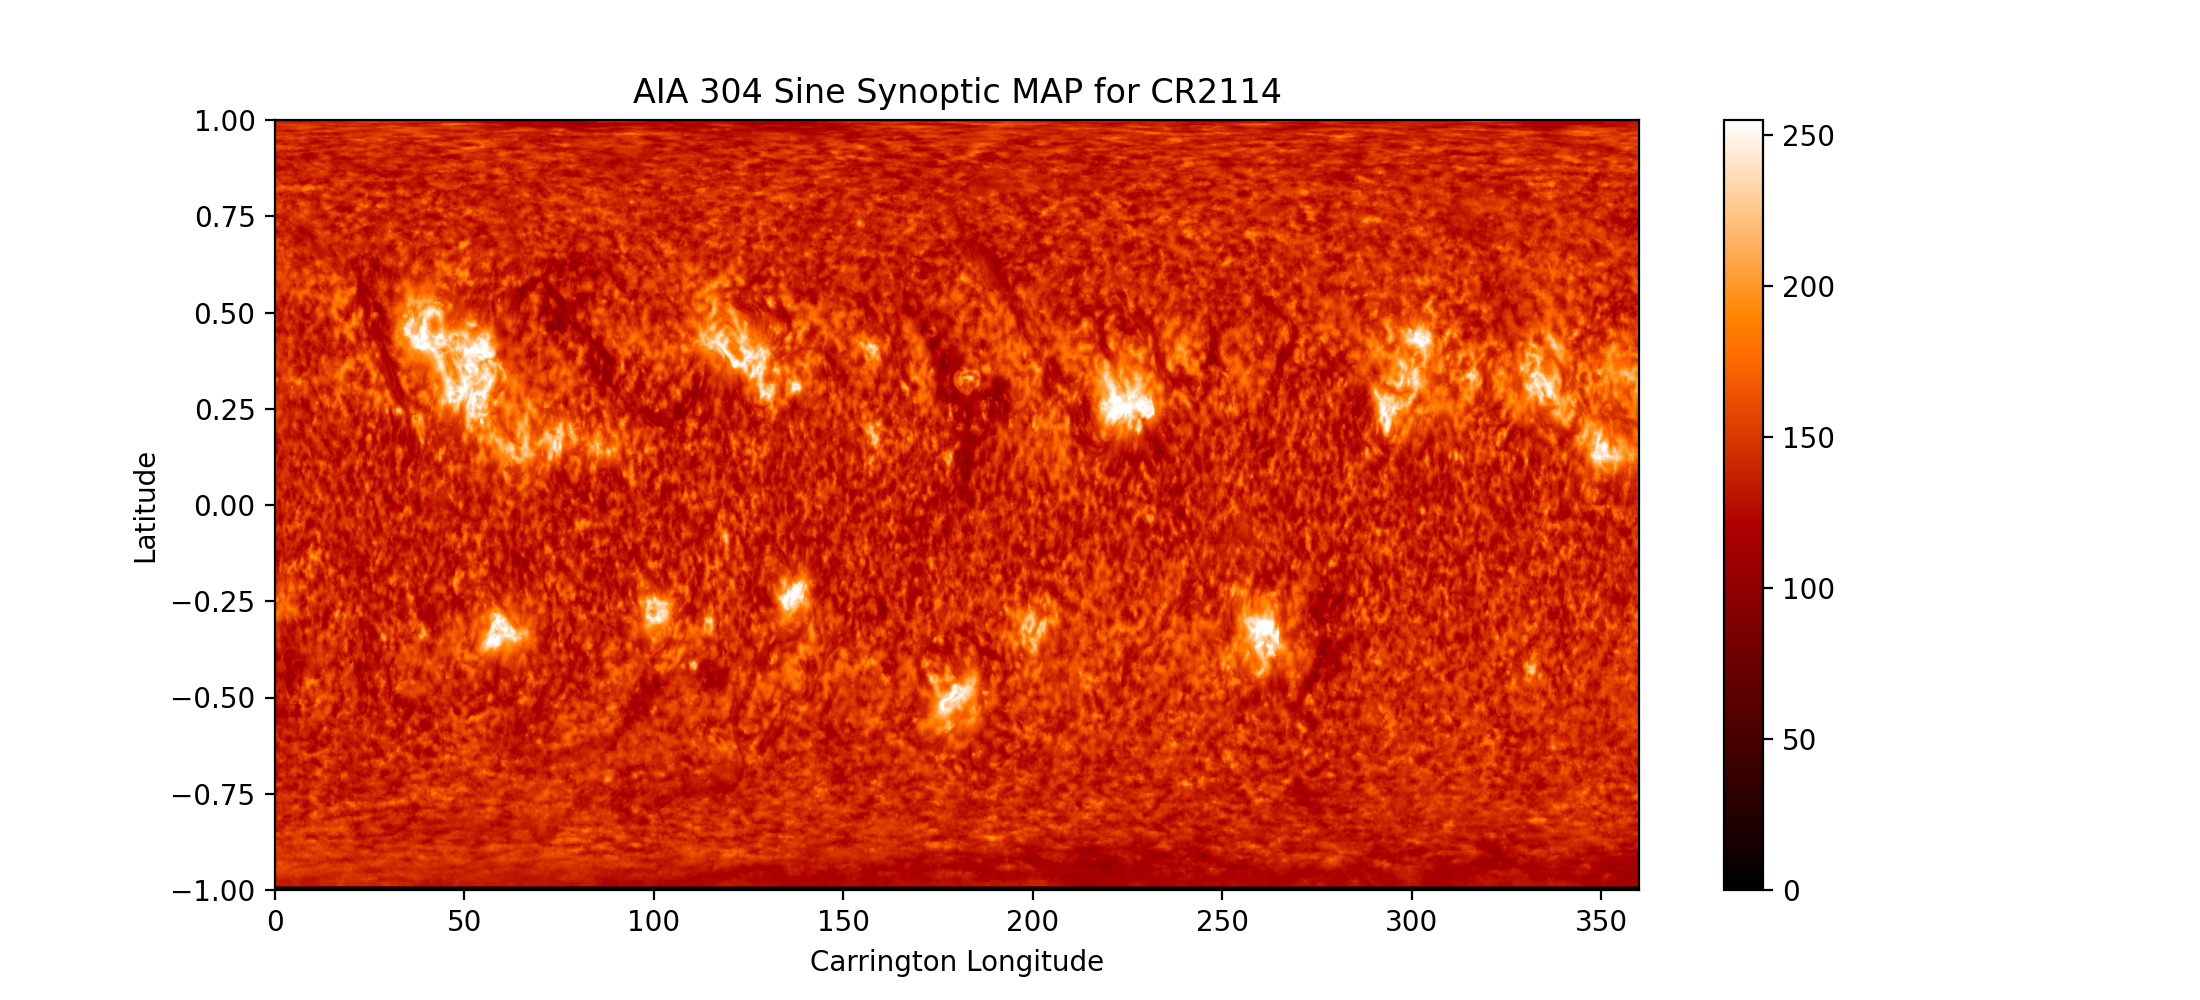

In [11]:
fig, ax = plt.subplots(figsize=(11, 5))
im = ax.imshow(sin[0].data, cmap='sdoaia304', extent=sin_extent, origin='lower', aspect='auto')
ax.set_xlabel('Carrington Longitude')
ax.set_ylabel('Latitude')
ax.set_title('AIA 304 Sine Synoptic MAP for CR2114')
fig.colorbar(im);

## Interpolation to transform latitude synoptic map to sin synoptic map

Below, we only consider very simple interpolation. More sophisticated approaches may be worth investigating.

- https://link.springer.com/article/10.1023/B:SOLA.0000021743.24248.b0
- https://reproject.readthedocs.io/en/stable/index.html

In [12]:
lat_data = lat[0].data

In [13]:
lat_data.shape

(1080, 3600)

In [14]:
lat_edges = np.linspace(90, -90, lat_data.shape[0] + 1)
lat_edges

array([ 90.        ,  89.83333333,  89.66666667, ..., -89.66666667,
       -89.83333333, -90.        ])

In [15]:
lat_delta = (90 - -90) / lat_data.shape[0]
1 - lat_delta

0.8333333333333334

In [16]:
lat_centers = lat_edges[:-1] - lat_delta/2
lat_centers[0], np.mean(lat_edges[:2]), len(lat_centers)

(89.91666666666667, 89.91666666666666, 1080)

In [17]:
lat_interp = sp.interpolate.interp1d(lat_centers, lat_data, axis=0)

In [18]:
sin_lat_edges = np.linspace(1, -1, lat_data.shape[0] + 1)
sin_lat_edges

array([ 1.        ,  0.99814815,  0.9962963 , ..., -0.9962963 ,
       -0.99814815, -1.        ])

In [19]:
sin_delta = (1 - -1) / lat_data.shape[0]
1 - sin_delta

0.9981481481481481

In [20]:
sin_lat_centers = sin_lat_edges[:-1] - sin_delta/2
sin_lat_centers[0], np.mean(sin_lat_edges[:2]), len(sin_lat_centers)

(0.9990740740740741, 0.999074074074074, 1080)

In [21]:
np.rad2deg(np.arcsin(sin_lat_centers))

array([ 87.53419194,  85.72843556,  84.48458179, ..., -84.48458179,
       -85.72843556, -87.53419194])

In [22]:
sin_lat_data = lat_interp(np.rad2deg(np.arcsin(sin_lat_centers)))

<IPython.core.display.Javascript object>


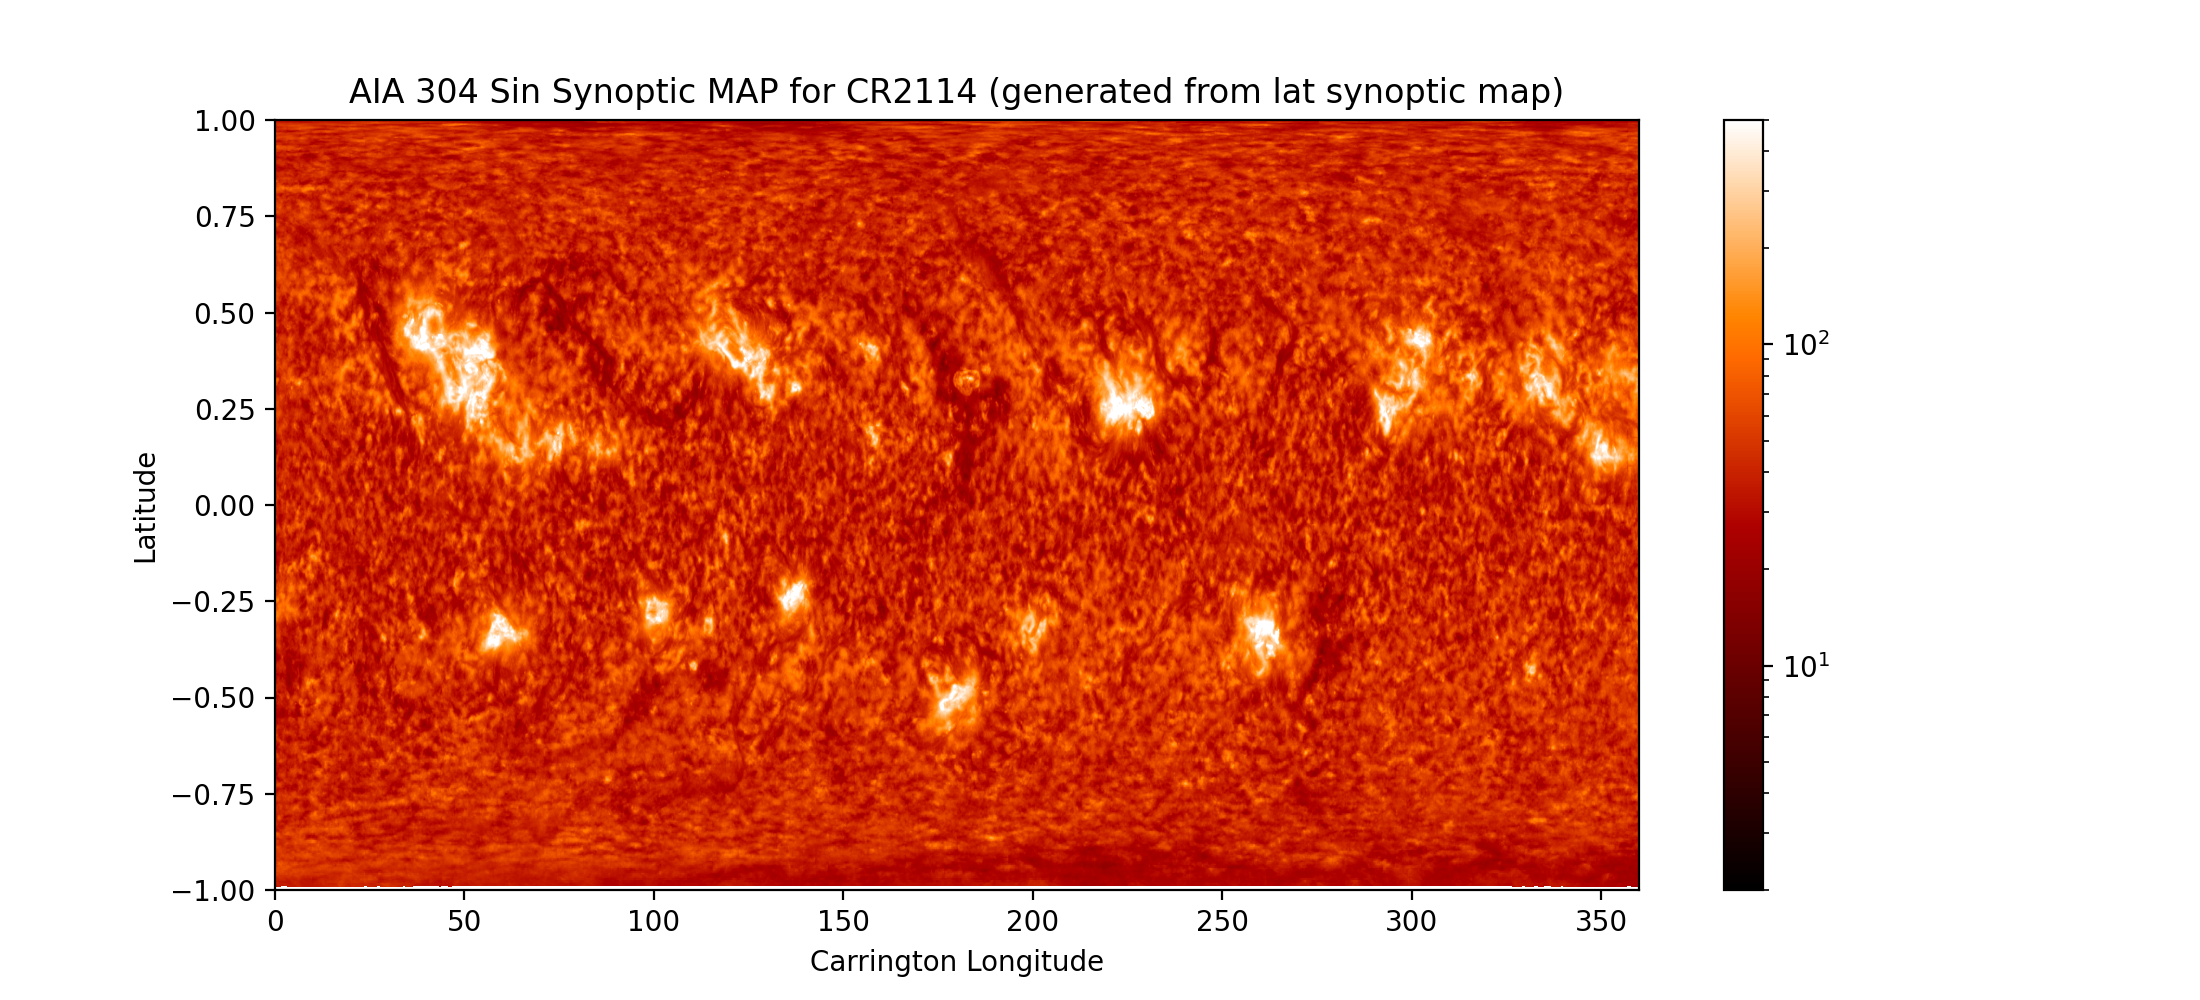

In [23]:
fig, ax = plt.subplots(figsize=(11, 5))
im = ax.imshow(sin_lat_data, cmap='sdoaia304', norm=colors.LogNorm(2, 500), aspect='auto', extent=sin_extent, origin='lower')
ax.set_xlabel('Carrington Longitude')
ax.set_ylabel('Latitude')
ax.set_title('AIA 304 Sin Synoptic MAP for CR2114 (generated from lat synoptic map)')
fig.colorbar(im);

In [24]:
intensity_mapper = colors.LogNorm(2, 500)

In [25]:
sin_lat_data_log = (intensity_mapper(sin_lat_data) * 255).clip(0, 255)

<IPython.core.display.Javascript object>


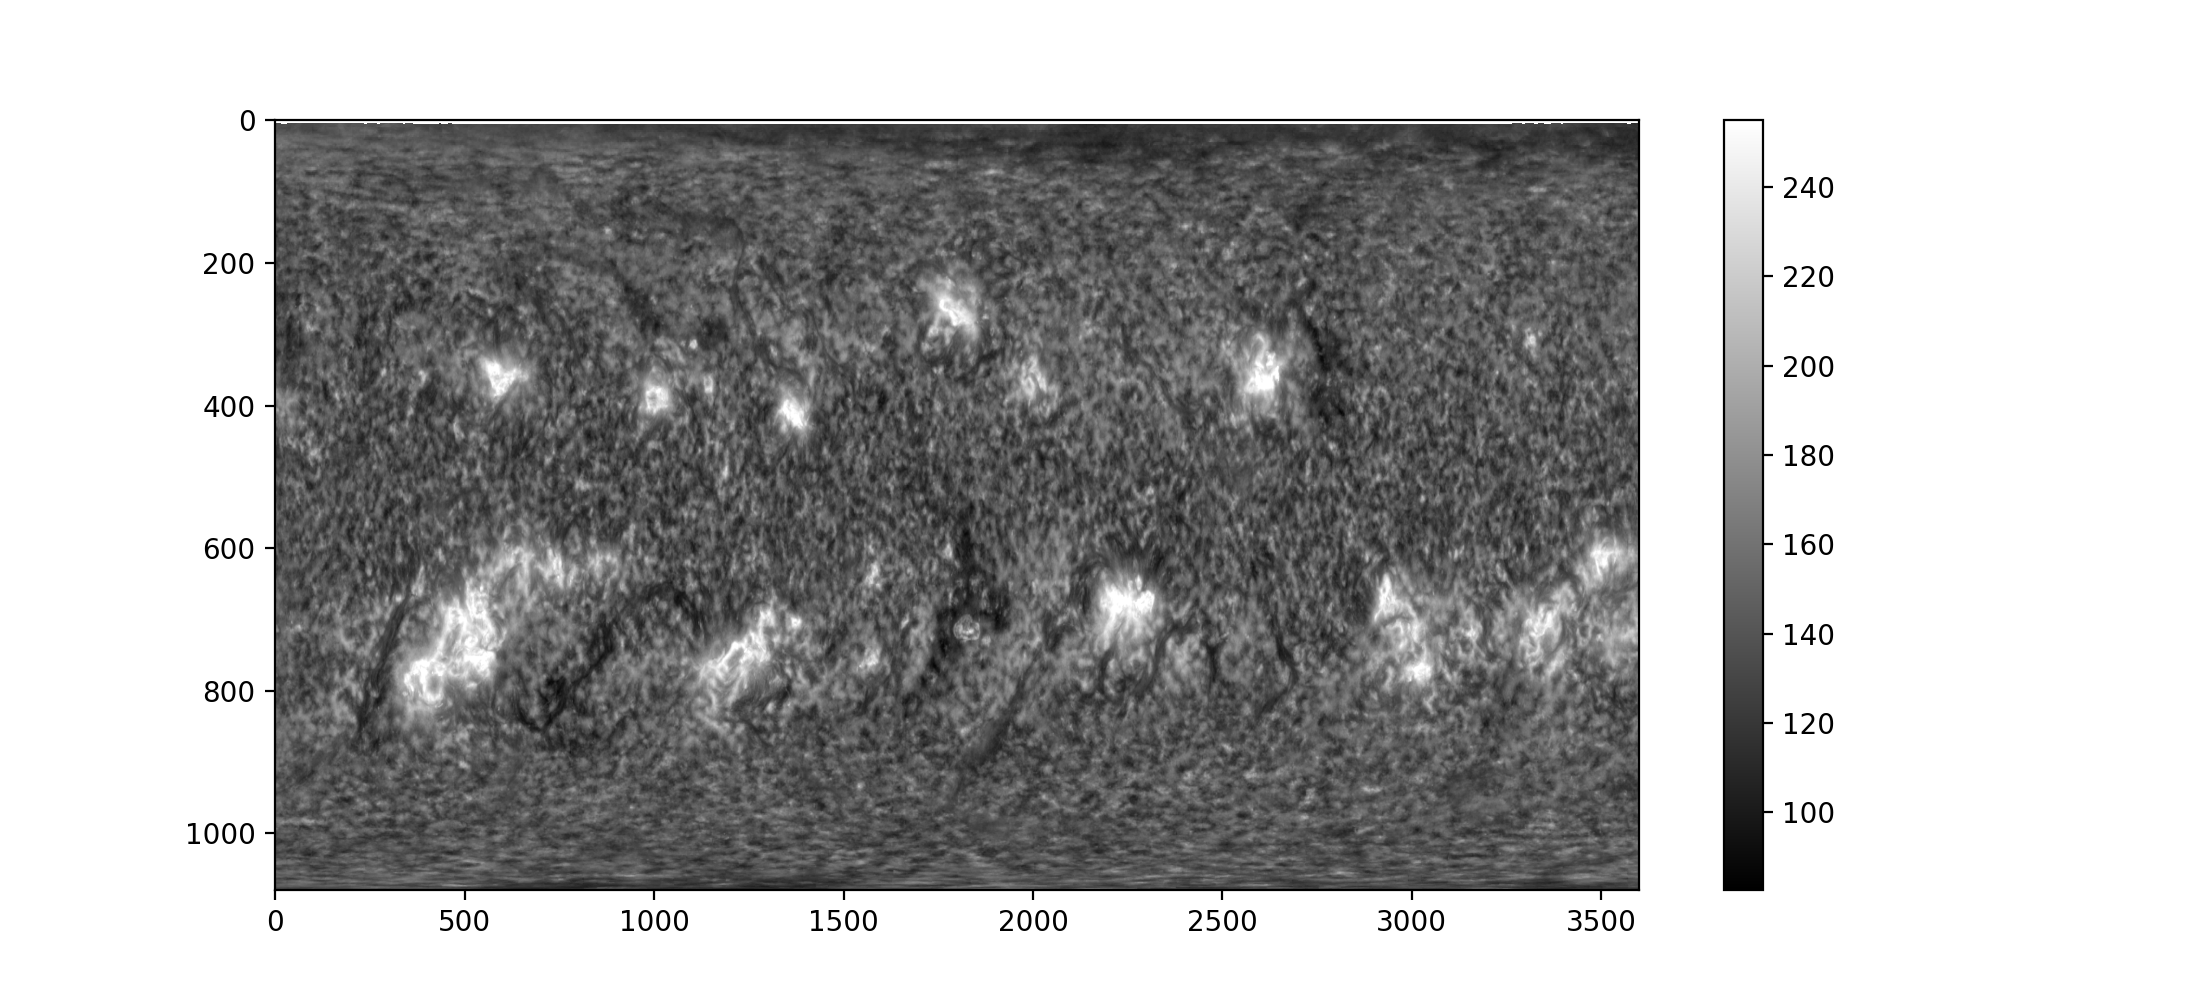

In [26]:
fig, ax = plt.subplots(figsize=(11, 5))
im = ax.imshow(sin_lat_data_log, aspect='auto', cmap='gray')
fig.colorbar(im)